<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/TrigNumerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Numerical Values of Trigs
</h1></b>

Dr. Bingsen Wang

12/21/2023
</center>

#Python Code
The Python code illustrates the Numerical Values of trigonometries.

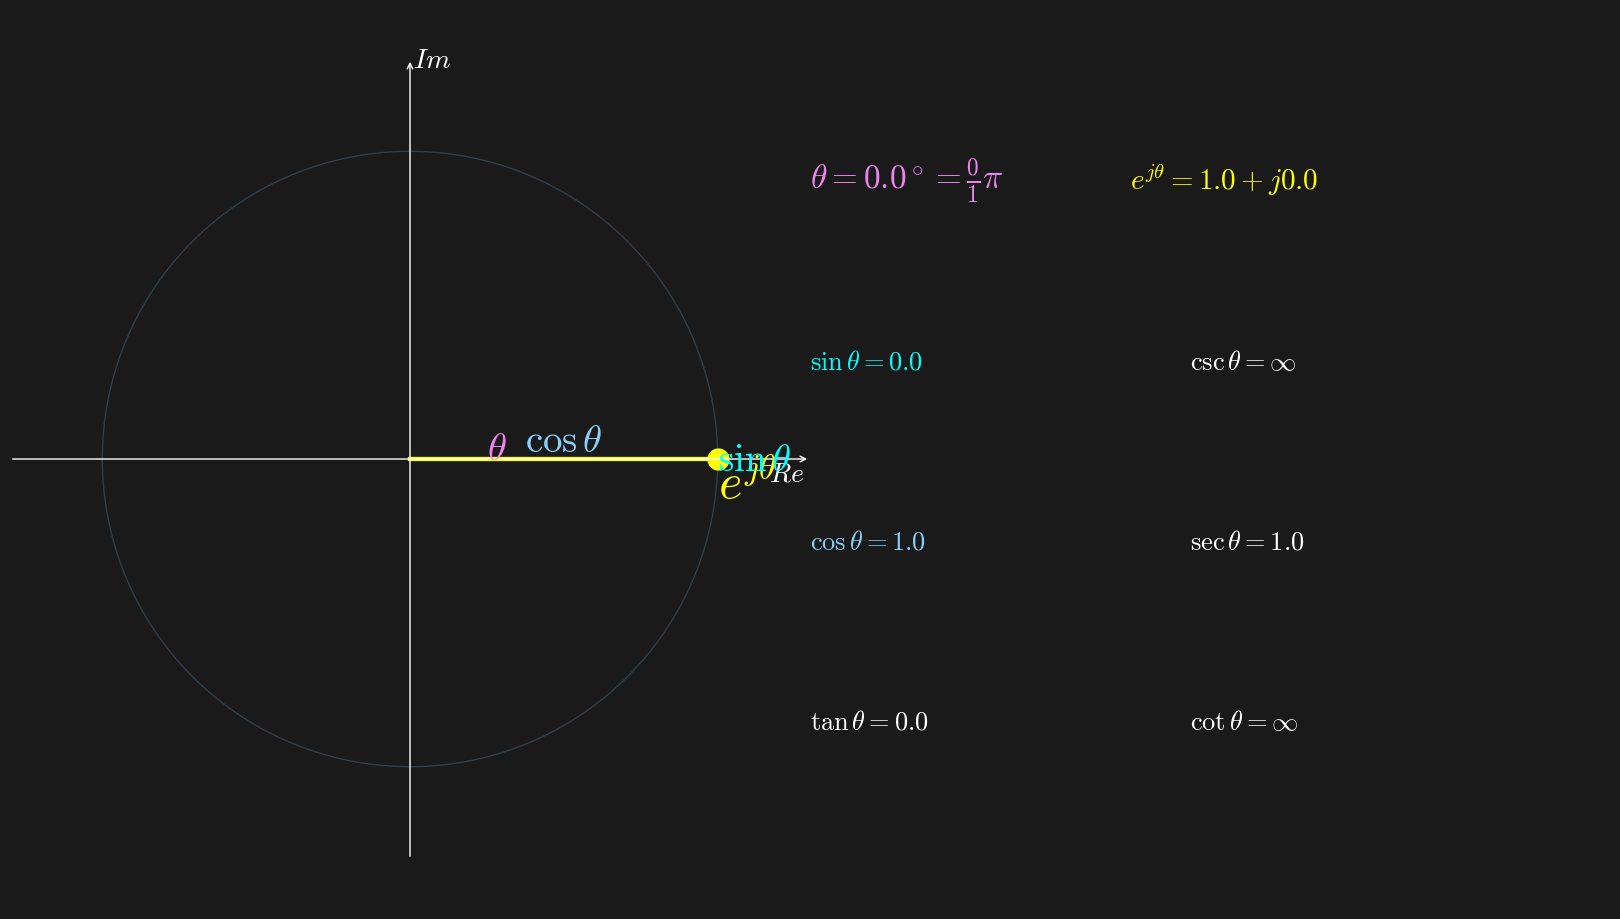

In [121]:
from os import linesep
from mpmath import sin,cos,tan,csc,sec,cot
from fractions import Fraction
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

#parameters
clst=['lightskyblue','violet','aqua','cornflowerblue','yellow','w',(.1,.1,.1)] #colors dark bg
# clst=['mediumblue','violet','c','r','navy','k','w'] #colors light bg
Nf = 1440
# Nf=36
Nd = 16 # number of decimals
div = np.linspace(0,(1-1/Nf),Nf) #total divs
theta_deg=div*360
theta_rad=div*2*np.pi
ejth = np.exp(1j*theta_rad)

#set up figures
fig = plt.figure(figsize=(16,9),facecolor=clst[-1])
fig.tight_layout()
ax_frame = [[[0, 1/18, .5, 8/9], [-1.3,1.3], [-1.3,1.3]], #complex plane
            [[.5, 0, .5, 1], [0,1], [0,1]], #numericals
            ]# [pos-boundary, xlim, ylim] for subplots 9:9
ax_lst=[] #axis list or the list of subplots
txt_lst=[] #list of y texts
line_lst = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  if k==0:
    ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #x-axis
    ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #y-axis
    ax.text(0.01,ym,'$Im$',color=clst[-2],size=20,va='center') #y label
    ax.text(xm-.02,0,'$Re$',size=20,va='top',ha='right',color=clst[-2]) #x-axis label
    line_lst.append(ax.plot([],[],color=clst[1],lw=3)[0]) #arc
    line_lst.append(ax.plot([],[],color=clst[0],lw=3)[0]) #run
    line_lst.append(ax.plot([],[],color=clst[2],lw=3)[0]) #rise
    line_lst.append(ax.plot([],[],color=clst[4],lw=3)[0]) #hyp
    line_lst.append(ax.plot([],[],color=clst[1],lw=1)[0]) #theta angle arc
    line_lst.append(ax.plot([],[],color=clst[4],ls='',marker='o',markersize=15)[0]) #dot

    txt_theta = ax.text(.25,0,r'$\theta$',size=28,color=clst[1])
    txt_ejt = ax.text(1,0,r'$e^{j\theta}$',size=36,color=clst[4])
    txt_sin = ax.text(1,0,r'$\sin\theta$',size=28,color=clst[2],va='center')
    txt_cos = ax.text(.5,0,r'$\cos\theta$',size=28,color=clst[0],ha='center')
  if k==1:
    for mm in range(2):
      for m in range(4):
        if mm==0 and m==0:
          txt_lst.append(ax.text(0,.8-m*.2,'',size=24,color=clst[1]))
        elif mm==1 and m==0:
          txt_lst.append(ax.text(.4,.8-m*.2,'',size=21,color=clst[4]))
        elif mm==0 and m==1:
          txt_lst.append(ax.text(mm*.475,.8-m*.2,'',size=19,color=clst[2])) #sin
        elif mm==0 and m==2:
          txt_lst.append(ax.text(mm*.475,.8-m*.2,'',size=19,color=clst[0])) #cos
        else:
          txt_lst.append(ax.text(mm*.475,.8-m*.2,'',size=19,color=clst[-2]))
ax_lst[0].plot(ejth.real,ejth.imag,color=clst[0],lw=1,alpha=0.2)

# animation function. This is called sequentially
def animate(i):
  # i=3
  line_lst[0].set_data(ejth[:i+1].real,ejth[:i+1].imag)
  line_lst[1].set_data([0,ejth[i].real],[0,0])
  line_lst[2].set_data([ejth[i].real,ejth[i].real],[0,ejth[i].imag])
  line_lst[3].set_data([0,ejth[i].real],[0,ejth[i].imag])
  line_lst[4].set_data(.25*ejth[:i+1].real,.25*ejth[:i+1].imag)
  line_lst[5].set_data([ejth[i].real],[ejth[i].imag])
  txt_ejt.set_position((cos(theta_rad[i]),sin(theta_rad[i])))
  if cos(theta_rad[i])>0:
    txt_ejt.set_ha('left')
    txt_sin.set_ha('left')
  else:
    txt_ejt.set_ha('right')
    txt_sin.set_ha('right')

  if sin(theta_rad[i])>0:
    txt_ejt.set_va('bottom')
    txt_cos.set_va('top')
  else:
    txt_ejt.set_va('top')
    txt_cos.set_va('bottom')
  if cos(.5*theta_rad[i])>0:
    txt_theta.set_ha('left')
  else:
    txt_theta.set_ha('right')


  txt_theta.set_position((.25*cos(.5*theta_rad[i]),.25*sin(.5*theta_rad[i])))
  txt_cos.set_position((.5*cos(theta_rad[i]),0))
  txt_sin.set_position((cos(theta_rad[i]),.5*sin(theta_rad[i])))

  txt_lst[0].set_text(r'$\theta='+str(round(theta_deg[i],4))+
                      r'^\circ=\frac{'+str(Fraction(i,Nf).numerator)+'}{'
                      +str(Fraction(i,Nf).denominator)+'}\pi$')
  txt_lst[2].set_text(r'$\cos\theta ='+str(round(cos(theta_rad[i]),Nd))+'$')
  txt_lst[1].set_text(r'$\sin\theta ='+str(round(sin(theta_rad[i]),Nd))+'$')
  if cos(theta_rad[i])==0:
    txt_lst[3].set_text(r'$\tan\theta =\infty$')
    txt_lst[6].set_text(r'$\sec\theta =\infty$')
  else:
    txt_lst[3].set_text(r'$\tan\theta ='+str(round(tan(theta_rad[i]),Nd))+'$')
    txt_lst[6].set_text(r'$\sec\theta ='+str(round(sec(theta_rad[i]),Nd))+'$')

  if sin(theta_rad[i])<0:
    txt_lst[4].set_text(r'$e^{j\theta} ='+str(round(cos(theta_rad[i]),int(.5*Nd)))+'-j'+
                        str(round(-sin(theta_rad[i]),int(.5*Nd)))+'$')
  else:
    txt_lst[4].set_text(r'$e^{j\theta} ='+str(round(cos(theta_rad[i]),int(.5*Nd)))+'+j'+
                        str(round(sin(theta_rad[i]),int(.5*Nd)))+'$')
  if sin(theta_rad[i])==0:
    txt_lst[5].set_text(r'$\csc\theta =\infty$')
    txt_lst[7].set_text(r'$\cot\theta =\infty$')
  else:
    txt_lst[5].set_text(r'$\csc\theta ='+str(round(csc(theta_rad[i]),Nd))+'$')
    txt_lst[7].set_text(r'$\cot\theta ='+str(round(cot(theta_rad[i]),Nd))+'$')
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=200)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = "TrigNum.mp4"
writervideo = animation.FFMpegWriter(fps=1)
anim.save(fn, writer=writervideo,dpi = 120)